In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import astropy 
%matplotlib inline

In [2]:
search_ffi = lk.search_tesscut('TIC 182582608 ')
search_tpf = lk.search_targetpixelfile('TIC 182582608 ')
search_lcf = lk.search_lightcurve('TIC 182582608 ')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,TESScut,1426,TIC 182582608,0.0
1,TESS Sector 08,2019,TESScut,1426,TIC 182582608,0.0
2,TESS Sector 34,2021,TESScut,475,TIC 182582608,0.0
3,TESS Sector 35,2021,TESScut,475,TIC 182582608,0.0


In [24]:
search_result_s34 = lk.search_tesscut('TIC 182582608', sector=34)
cut_s34 = search_result_s34.download(cutout_size=20)
print(cut_s34)

TessTargetPixelFile(TICID: TIC 182582608)


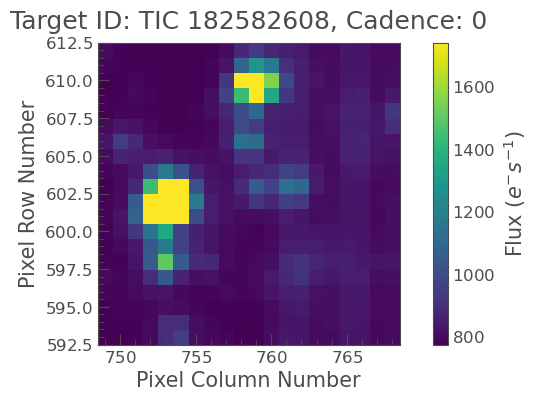

In [25]:
cut_s34.plot();

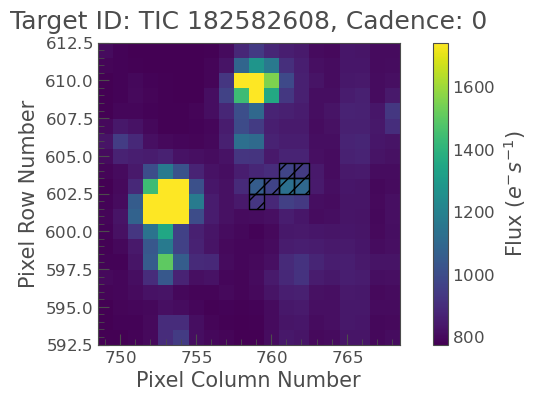

In [51]:
s34_target_mask = cut_s34.create_threshold_mask(threshold=4, reference_pixel='center')
s34_n_target_pixels = s34_target_mask.sum()
s34_n_target_pixels
cut_s34.plot(aperture_mask=s34_target_mask, mask_color='k');

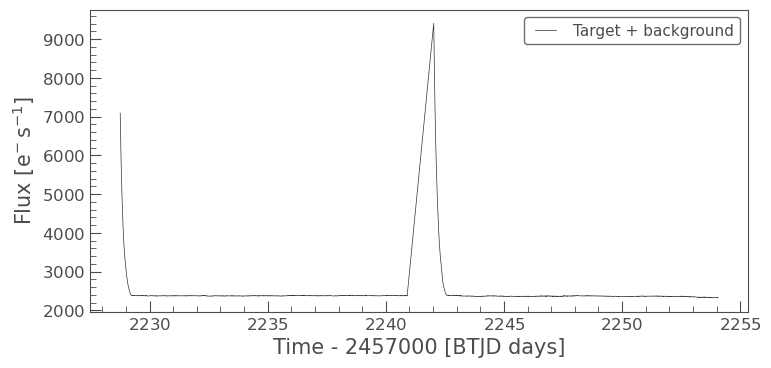

In [52]:
s34_target_lc = cut_s34.to_lightcurve(aperture_mask=s34_target_mask)
s34_target_lc.plot(label='Target + background');

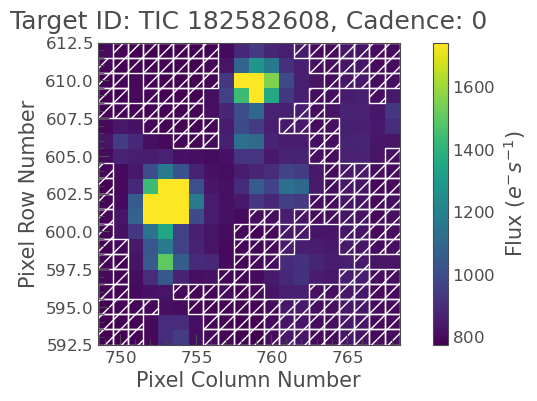

In [44]:
s34_background_mask = ~cut_s34.create_threshold_mask(threshold=0.001, reference_pixel= None)
cut_s34.plot(aperture_mask=s34_background_mask, mask_color='w');

In [53]:
s34_n_background_pixels = s34_background_mask.sum()
s34_n_background_pixels

201

In [54]:
s34_background_lc_per_pixel = cut_s34.to_lightcurve(aperture_mask=s34_background_mask) / s34_n_background_pixels

In [55]:
s34_background_estimate_lc = s34_background_lc_per_pixel * s34_n_target_pixels

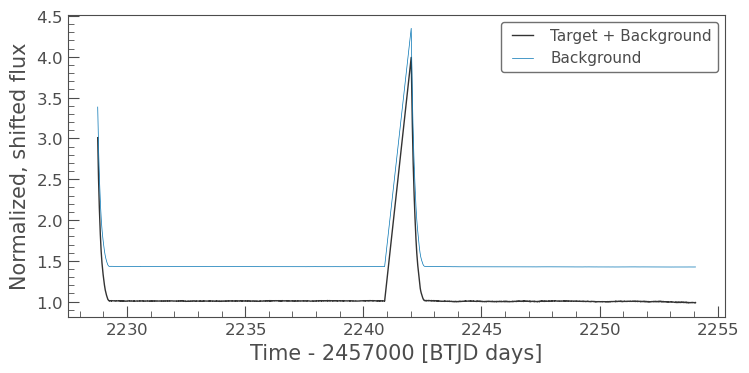

In [56]:
common_normalization = np.nanpercentile(s34_target_lc.flux, 10)
ax = (s34_target_lc / common_normalization).plot(normalize=False, label='Target + Background', lw=1);
(s34_background_estimate_lc / common_normalization +1).plot(ax=ax, normalize=False, label='Background',
                                                        ylabel='Normalized, shifted flux');

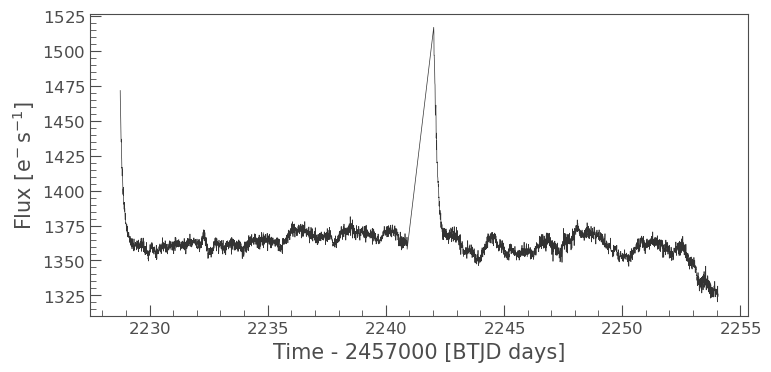

In [57]:
s34_corrected_lc = s34_target_lc - s34_background_estimate_lc.flux
s34_corrected_lc.plot();
